In [2]:
import pandas as pd                       #import all libraries#
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

### Changing data to make it more suitable for graph

In [5]:
referrals_df=pd.read_csv('../../datasets/NHS_cleaned/NHS_manual_data_cleaned_reformat.csv')
mood_df=pd.read_csv('../../datasets/popular_tracks_and_moods.csv')
referrals_df.head()


mood_df = mood_df.loc[:, ['date','position','title','mood']]    #drop all columns except date , position and mood
mood_df['positivity']=mood_df['mood']
mood_df['average positivity']=""

mood_df['positivity']=np.where((mood_df['positivity']=='happy') | (mood_df['positivity']== 'calm'),100,0) #convert positive moods to numbers, if not pos parse as 0




### Creating graph

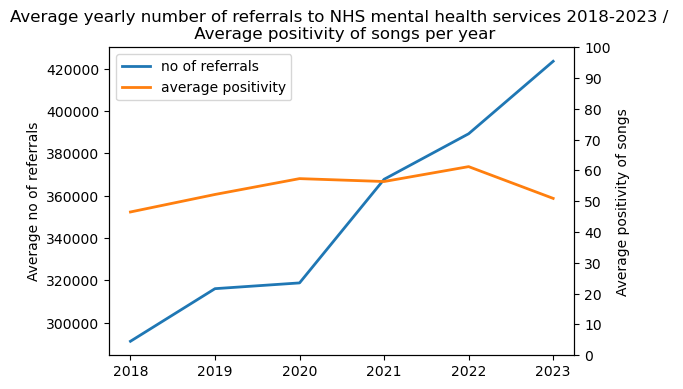

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
                                                
mood_df['year']=mood_df['date'].str[0:4]
mood_df_avg=mood_df.groupby('year')['positivity'].mean()      #make mood df a dataframe#
mood_df_avg = mood_df_avg.to_frame().reset_index()

percentage=[0,10,20,30,40,50,60,70,80,90,100]          #percentage for y axis 2 #

years=mood_df_avg['year']

fig, ax1 = plt.subplots(figsize=(6, 4))

referrals_dfgb=referrals_df.groupby('year')['no_of_referrals'].mean()
lns1=ax1.plot(years, referrals_dfgb,color='tab:blue',label='no of referrals',linewidth=2)

ax2 = ax1.twinx()

lns2=ax2.plot(years,mood_df_avg['positivity'],color='tab:orange',label='average positivity',linewidth=2)
ax2.set_ylim([0,100])

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.yticks(np.arange(0,110, step=10))
plt.title(f'Average yearly number of referrals to NHS mental health services 2018-2023 / \n Average positivity of songs per year')

ax1.set_ylabel('Average no of referrals')
ax2.set_ylabel('Average positivity of songs')
#referrals_avg.plot(x = years,y = avg_referrals, ax=ax)
#referrals_avg.plot(x = years, y = percentage, ax = ax, secondary_y = True) 
plt.show()

## Original graph
This was the graph I started out with but I decided that more finegrained visualisation would be useful

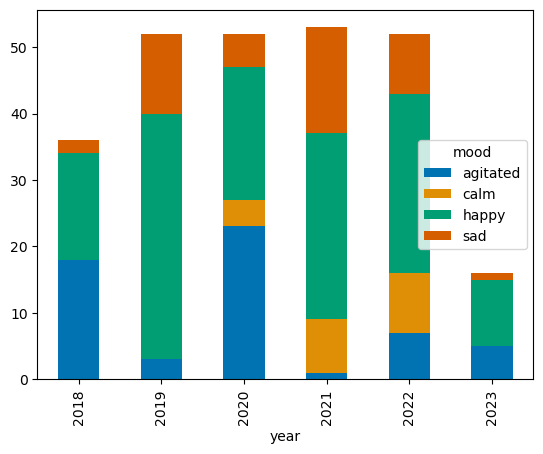

In [4]:
#want to plot no of happy songs that were no 1 each year# 

mood_df_position = mood_df.loc[:, ['position','title','mood']] 

mood_df_position['year']=mood_df['date'].str[0:4]
mood_df_position['year']=mood_df_position['year'].astype(int)


mood_df_position=mood_df_position[(((mood_df_position['mood']=='happy')|(mood_df_position['mood']=='sad')|(mood_df_position['mood']=='agitated')|(mood_df_position['mood']=='calm'))
                                   &(mood_df_position['position']==1))]              #get all no 1 songs#

sns.set_palette("colorblind")
mood_df_position.groupby('year')['mood'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.xticks(rotation=360)
plt.ylabel('No of songs')
plt.title("Graph showing the mood of no 1 songs from 2018-2023")
plt.legend(loc='upper right')
mood_df_position_cross=pd.crosstab([mood_df_position['position'],mood_df_position['year']],mood_df_position['mood'])
plt.show()

## Creating table for a stacked percentage graph

In [5]:
mood_df2=mood_df_position.groupby('year')['mood'].value_counts().unstack()
mood_df2= mood_df2.fillna(0)
mood_df2['total']=mood_df2['agitated']+mood_df2['calm']+mood_df2['happy']+mood_df2['sad']
mood_df2['agitated_percentage']=(mood_df2['agitated']/mood_df2['total'])*100

mood_df2['calm_percentage']=(mood_df2['calm']/mood_df2['total'])*100

mood_df2['happy_percentage']=(mood_df2['happy']/mood_df2['total'])*100
mood_df2['sad_percentage']=(mood_df2['sad']/mood_df2['total'])*100
mood_df2

mood,agitated,calm,happy,sad,total,agitated_percentage,calm_percentage,happy_percentage,sad_percentage
year,,,,,,,,,
2018,18.0,0.0,16.0,2.0,36.0,50.000000,0.000000,44.444444,5.555556
2019,3.0,0.0,37.0,12.0,52.0,5.769231,0.000000,71.153846,23.076923
2020,23.0,4.0,20.0,5.0,52.0,44.230769,7.692308,38.461538,9.615385
2021,1.0,8.0,28.0,16.0,53.0,1.886792,15.094340,52.830189,30.188679
2022,7.0,9.0,27.0,9.0,52.0,13.461538,17.307692,51.923077,17.307692
2023,5.0,0.0,10.0,1.0,16.0,31.250000,0.000000,62.500000,6.250000


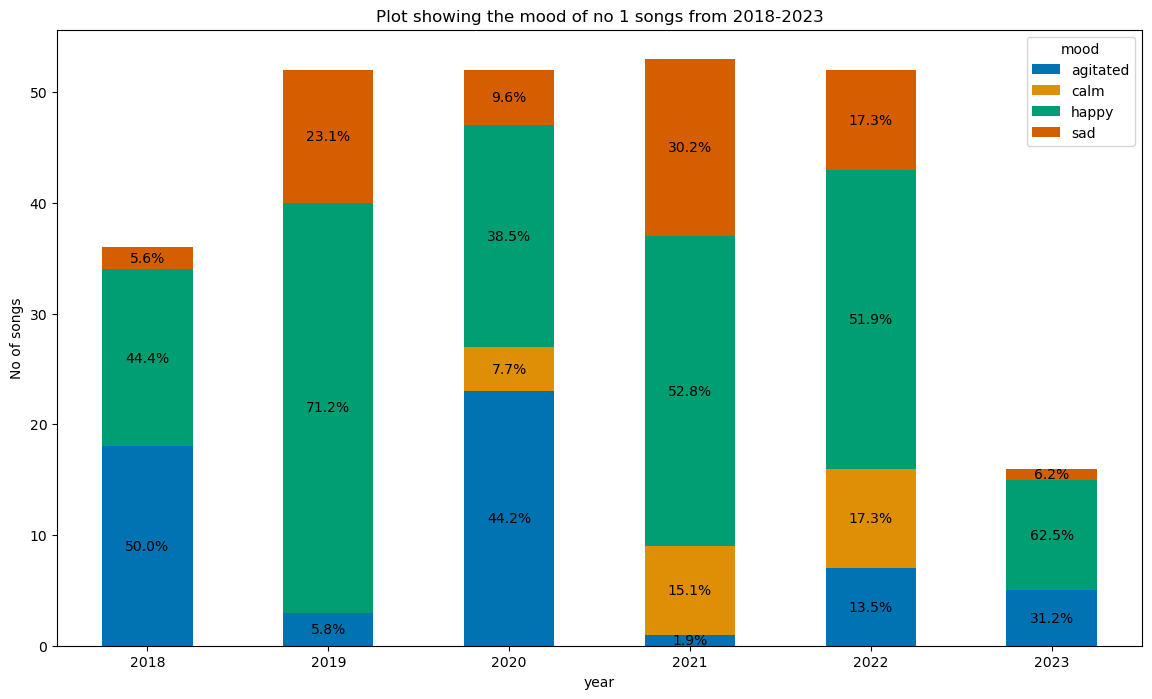

In [21]:
mood_df_position.groupby('year')['mood'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(14,8))
for year,row in mood_df2.iterrows():      #left to right - go across columns #
    for i,cs in enumerate(row[0:4].cumsum()):         #calculate cumulative sum top to bottom#
        value=row[i]                                 #store value (i.e.) counts so we can eliminate nulls - here calm#
        
        percentage=row[i+5]                          #retrieve correct percentage for each mood - 5 along from mood column# 
        if value>0.0:
            plt.text(year-2018,cs-(0.5*value),str(np.round(percentage, 1)) + '%',va = 'center', ha = 'center')
plt.xticks(rotation=360)
plt.title('Plot showing the mood of no 1 songs from 2018-2023')
plt.ylabel('No of songs')
plt.show()